In [26]:
#Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold



In [27]:
#Import the data
data = pd.read_csv('train.csv')
data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


# Exploratory Data Analysis

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [29]:
data.drop(columns = 'id', inplace=True )
data.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [30]:
data.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [31]:
data['honeybee'].unique()

array([ 0.5  ,  0.25 ,  0.75 ,  0.537,  0.   , 18.43 ,  6.64 ])

In [32]:
data.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


Data range: 40 -10
            18-0
            0.585 - 0
            0.75 - 0
            0.75 - 0
            94- 69
            57- 39
            79 - 58
Need for scaling

### Data Distribution

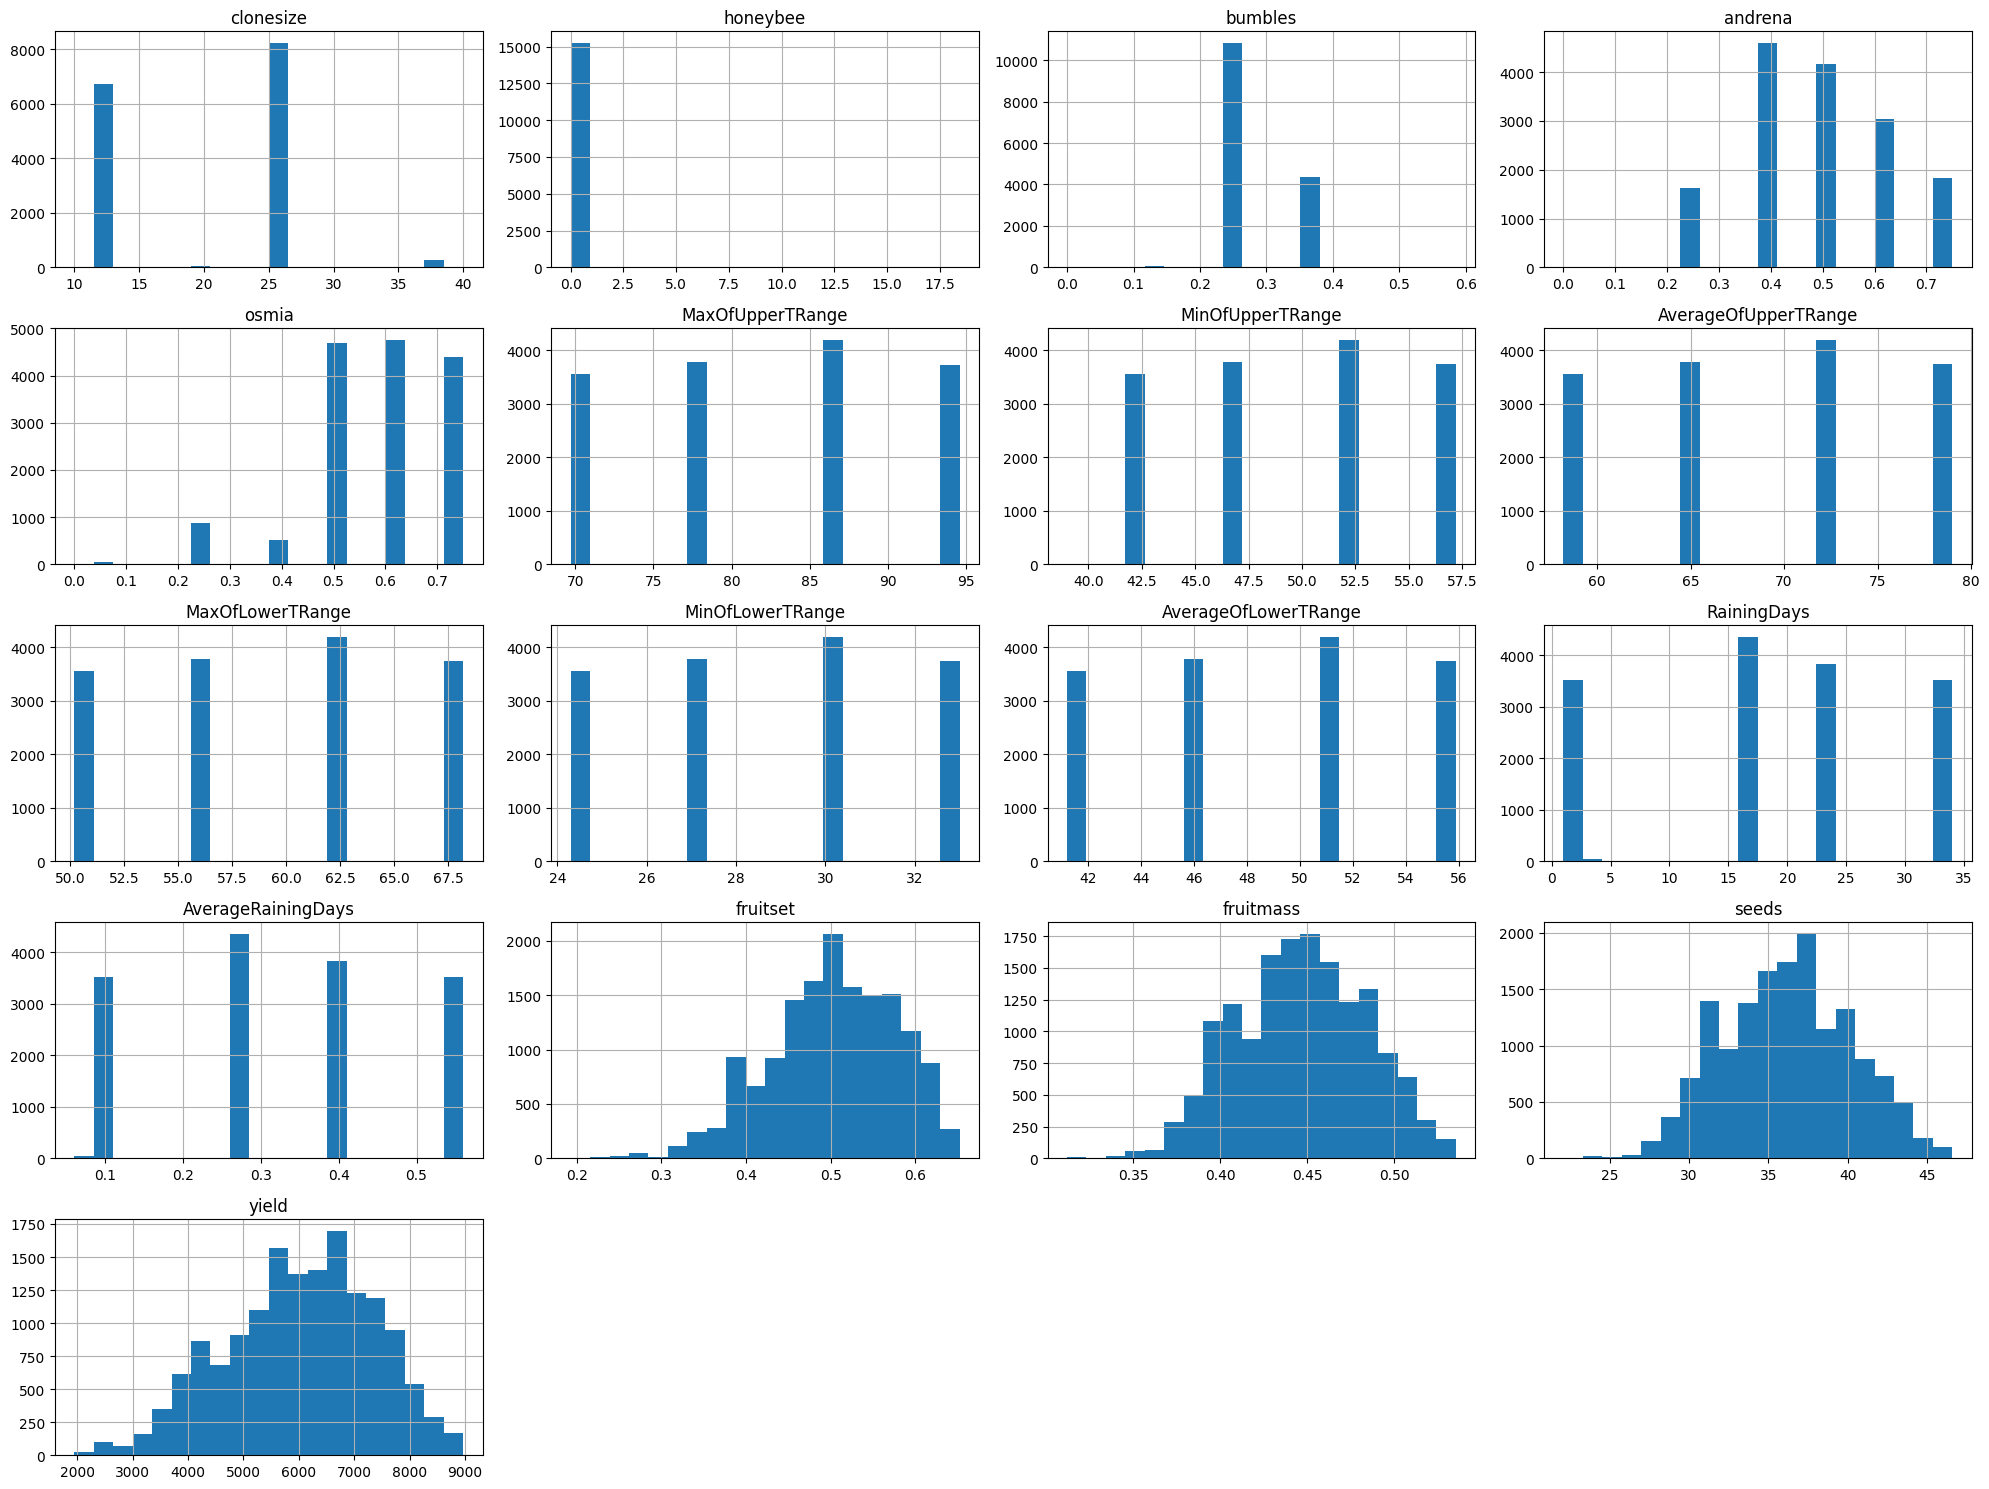

In [33]:
#Histogram
data.hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()


#### Log transformation

In [34]:
# Log transform for skewed distribution
log_features = ['honeybee', 'bumbles', 'seeds']

epsilon = 1e-8
for feature in log_features:
    data[feature] = np.log1p(data[feature] + epsilon)

### Scaling


In [35]:

# Standard scaling for features with a normal distribution
standard_features = ['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
                     'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
                     'fruitmass', 'yield']
scaler_standard = StandardScaler()
data[standard_features] = scaler_standard.fit_transform(data[standard_features])

# Robust scaling for skewed distribution
robust_features = ['honeybee', 'bumbles', 'seeds']
scaler_robust = RobustScaler()
data[robust_features] = scaler_robust.fit_transform(data[robust_features])

# MinMax scaling for uniform or bimodial distribution
minmax_features = ['clonesize', 'andrena', 'osmia', 'RainingDays', 'AverageRainingDays', 'fruitset']
scaler_minmax = MinMaxScaler()
data[minmax_features] = scaler_minmax.fit_transform(data[minmax_features])

# Check the result
data.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,1.528900e+04,1.528900e+04,1.528900e+04,1.528900e+04,1.528900e+04,1.528900e+04,15289.000000,15289.000000,15289.000000,1.528900e+04,15289.000000,1.528900e+04
mean,0.323490,-0.466052,0.282298,0.656901,0.789807,-8.411815e-16,1.663773e-16,3.327547e-16,2.816331e-16,-1.095860e-15,1.794830e-15,0.535178,0.528352,0.674795,8.314219e-16,-0.016377,1.345426e-16
std,0.219840,0.591486,0.462577,0.197487,0.185985,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,0.353260,0.327810,0.161923,1.000033e+00,0.687215,1.000033e+00
min,0.000000,-2.223901,-2.255343,0.000000,0.000000,-1.363365e+00,-1.924423e+00,-1.368341e+00,-1.365954e+00,-1.364693e+00,-1.366975e+00,0.000000,0.000000,0.000000,-3.635347e+00,-2.963196,-3.051326e+00
25%,0.083333,-1.000000,0.000000,0.506667,0.666667,-5.215041e-01,-5.180609e-01,-5.177290e-01,-5.188075e-01,-5.196924e-01,-5.136012e-01,0.454545,0.400000,0.577944,-7.381576e-01,-0.493836,-6.709212e-01
50%,0.500000,0.000000,0.000000,0.666667,0.840000,4.187562e-01,4.195140e-01,4.244873e-01,4.191051e-01,4.191977e-01,4.139790e-01,0.454545,0.400000,0.683195,4.675927e-04,0.000000,6.902094e-02
75%,0.500000,0.000000,1.000000,0.840000,1.000000,4.187562e-01,4.195140e-01,4.244873e-01,4.191051e-01,4.191977e-01,4.139790e-01,0.696970,0.660000,0.800400,7.447480e-01,0.506164,7.438225e-01
max,1.000000,14.048548,2.399848,1.000000,1.000000,1.359016e+00,1.357089e+00,1.353617e+00,1.357018e+00,1.358088e+00,1.360111e+00,1.000000,1.000000,1.000000,2.406102e+00,1.569042,2.202078e+00


In [36]:
data.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0.500000,0.0,0.0,1.000000,0.666667,-1.363365,-1.365484,-1.368341,-1.365954,-1.364693,-1.366975,0.69697,0.66,0.505601,-0.783260,-0.636625,-1.158091
1,0.500000,0.0,0.0,0.666667,0.666667,-1.363365,-1.365484,-1.368341,-1.365954,-1.364693,-1.366975,0.69697,0.66,0.548911,-0.661588,-0.380354,-0.356819
2,0.083333,-1.0,0.0,0.840000,0.840000,0.418756,0.419514,0.424487,0.419105,0.419198,0.413979,0.69697,0.66,0.784034,0.656157,0.377508,0.631694
3,0.083333,-1.0,0.0,0.840000,0.666667,-0.521504,-0.518061,-0.517729,-0.518808,-0.519692,-0.513601,0.69697,0.66,0.812440,0.852832,0.554225,0.639920
4,0.500000,0.0,0.0,0.840000,0.840000,-0.521504,-0.518061,-0.517729,-0.518808,-0.519692,-0.513601,0.69697,0.66,0.842261,1.285628,0.709683,1.088052


In [37]:
#Aggregation
# Temperature range difference
data['UpperTRangeDiff'] = data['MaxOfUpperTRange'] - data['MinOfUpperTRange']
data['LowerTRangeDiff'] = data['MaxOfLowerTRange'] - data['MinOfLowerTRange']

# Average temperature difference
data['AvgUpperLowerTempDiff'] = data['AverageOfUpperTRange'] - data['AverageOfLowerTRange']


### Bivariate Analysis

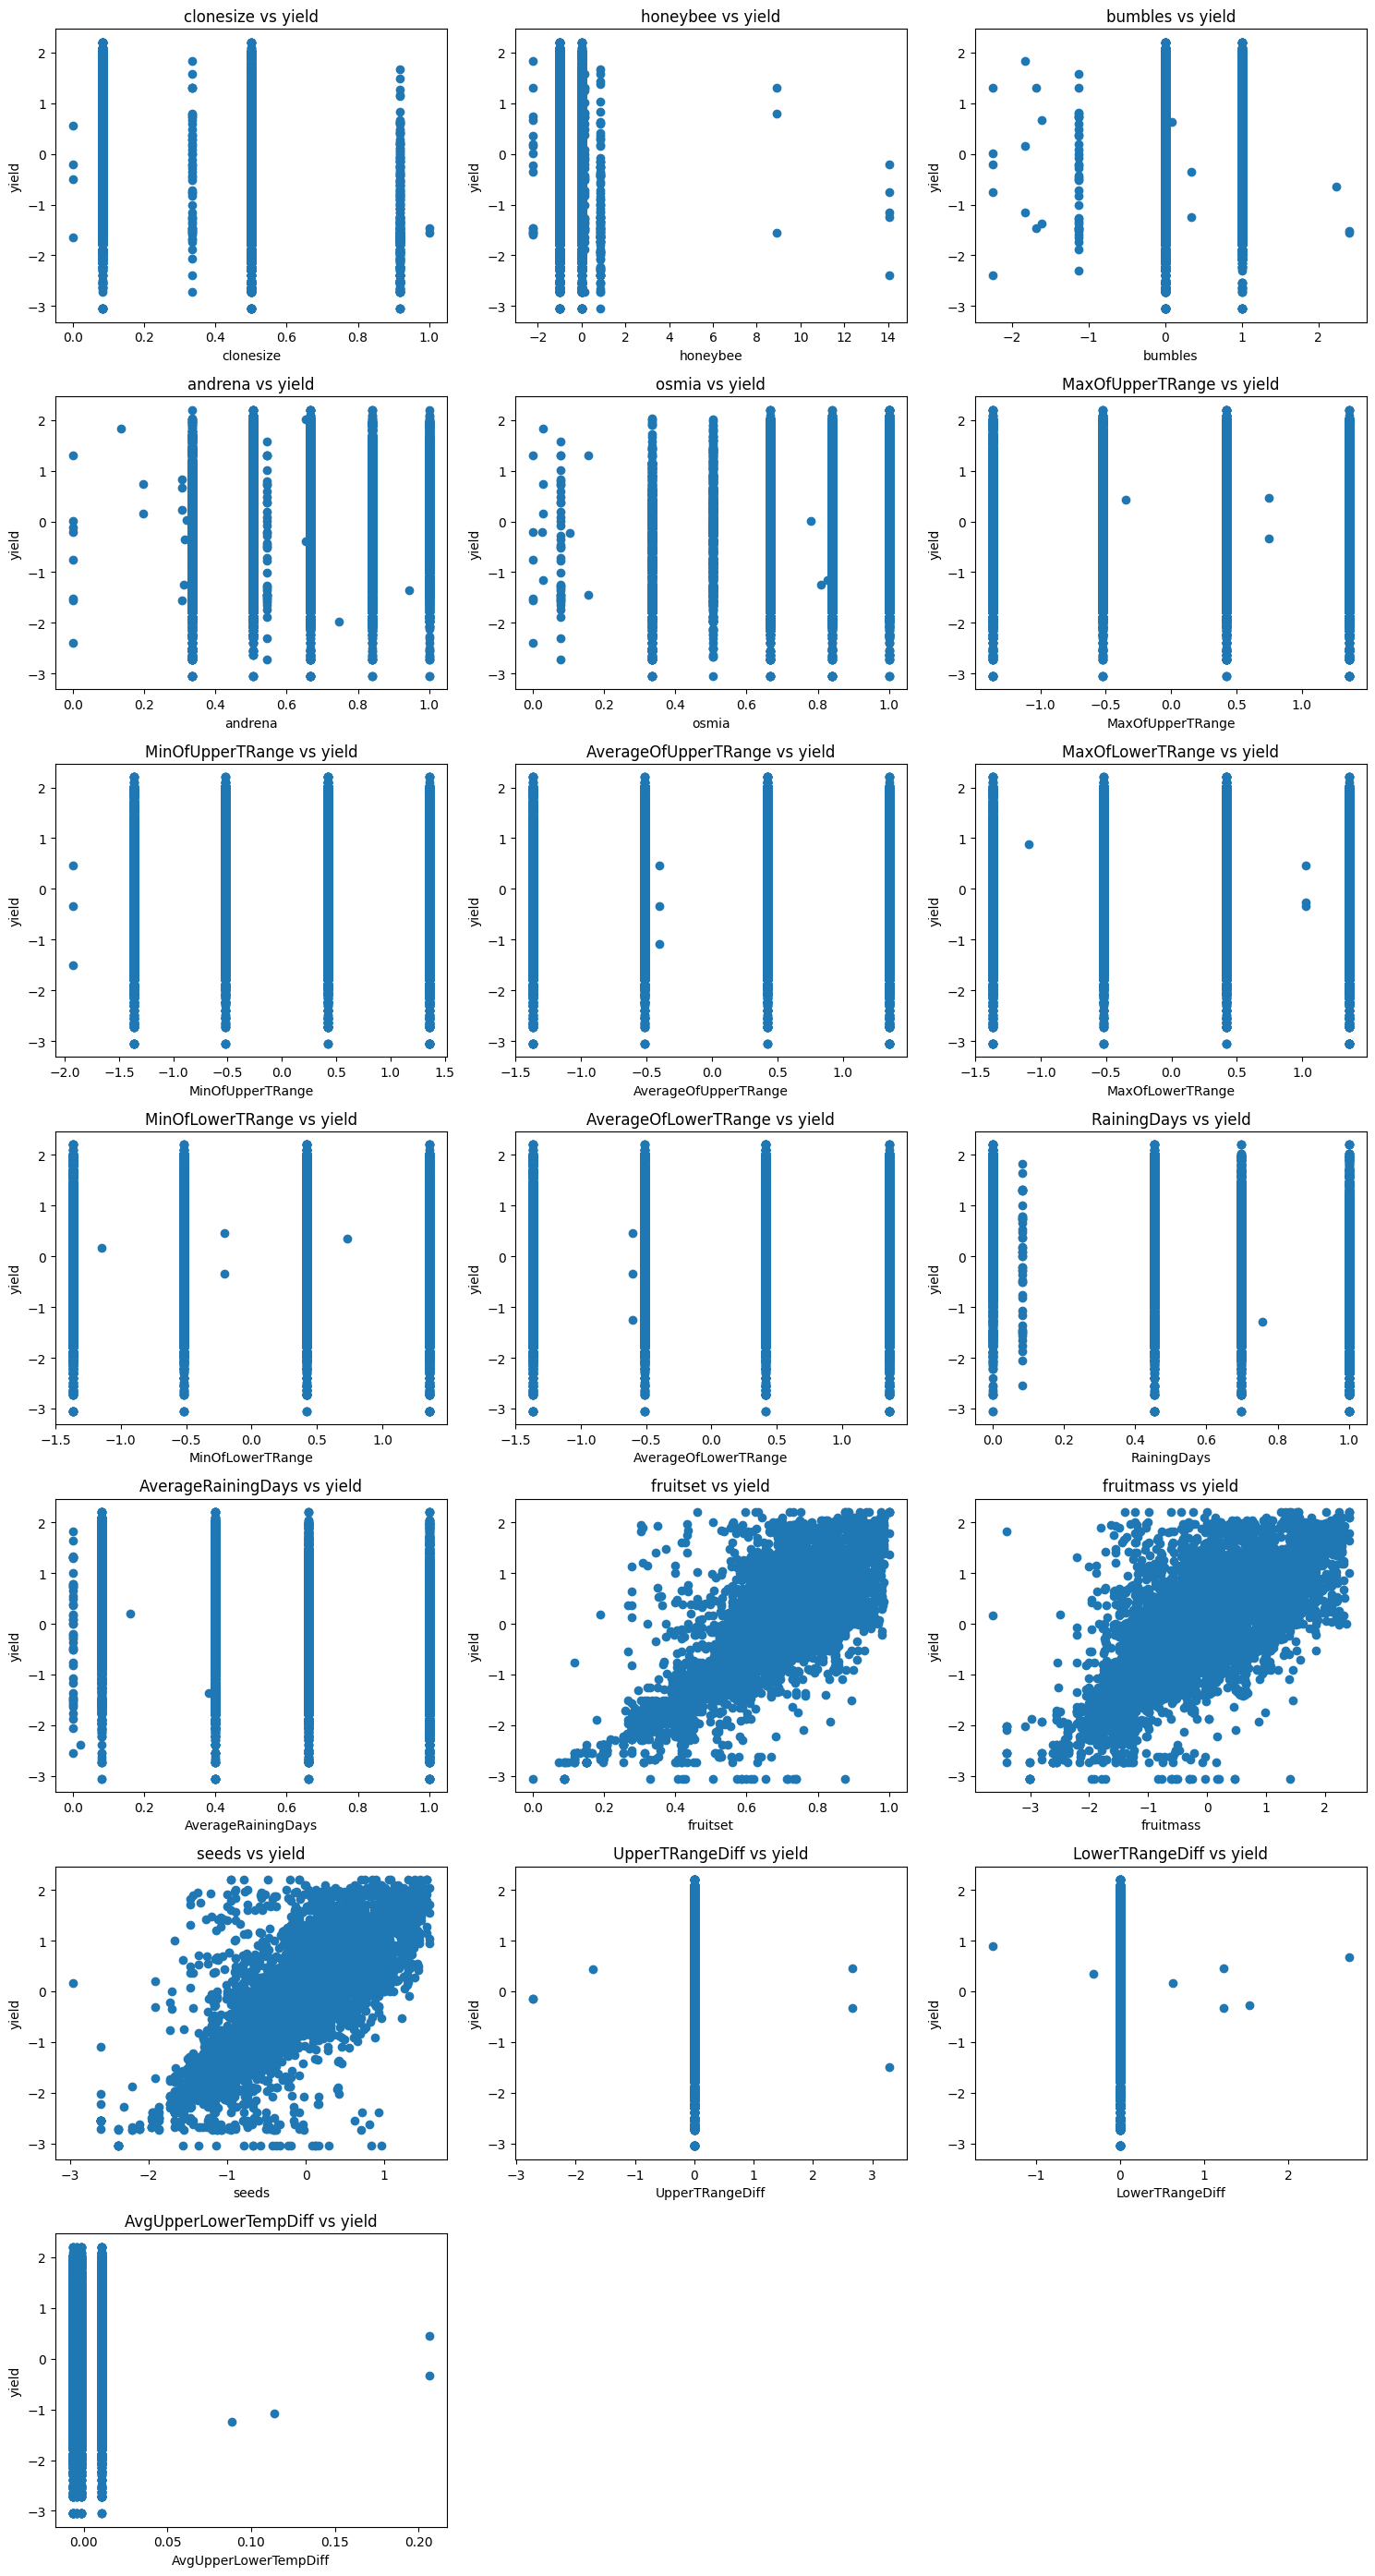

In [38]:
def create_scatter_plots(data, x_columns, y_column, n_cols=3):
    n_rows = (len(x_columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    
    # Flatten axes for easy iteration
    axes = axes.flatten()
    
    for ax, col in zip(axes, x_columns):
        ax.scatter(data[col], data[y_column])
        ax.set_xlabel(col)
        ax.set_ylabel(y_column)
        ax.set_title(f'{col} vs {y_column}')
    
    # Remove extra subplots
    for ax in axes[len(x_columns):]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()

# Usage
x_columns = data.columns.drop('yield')
create_scatter_plots(data, x_columns, 'yield')

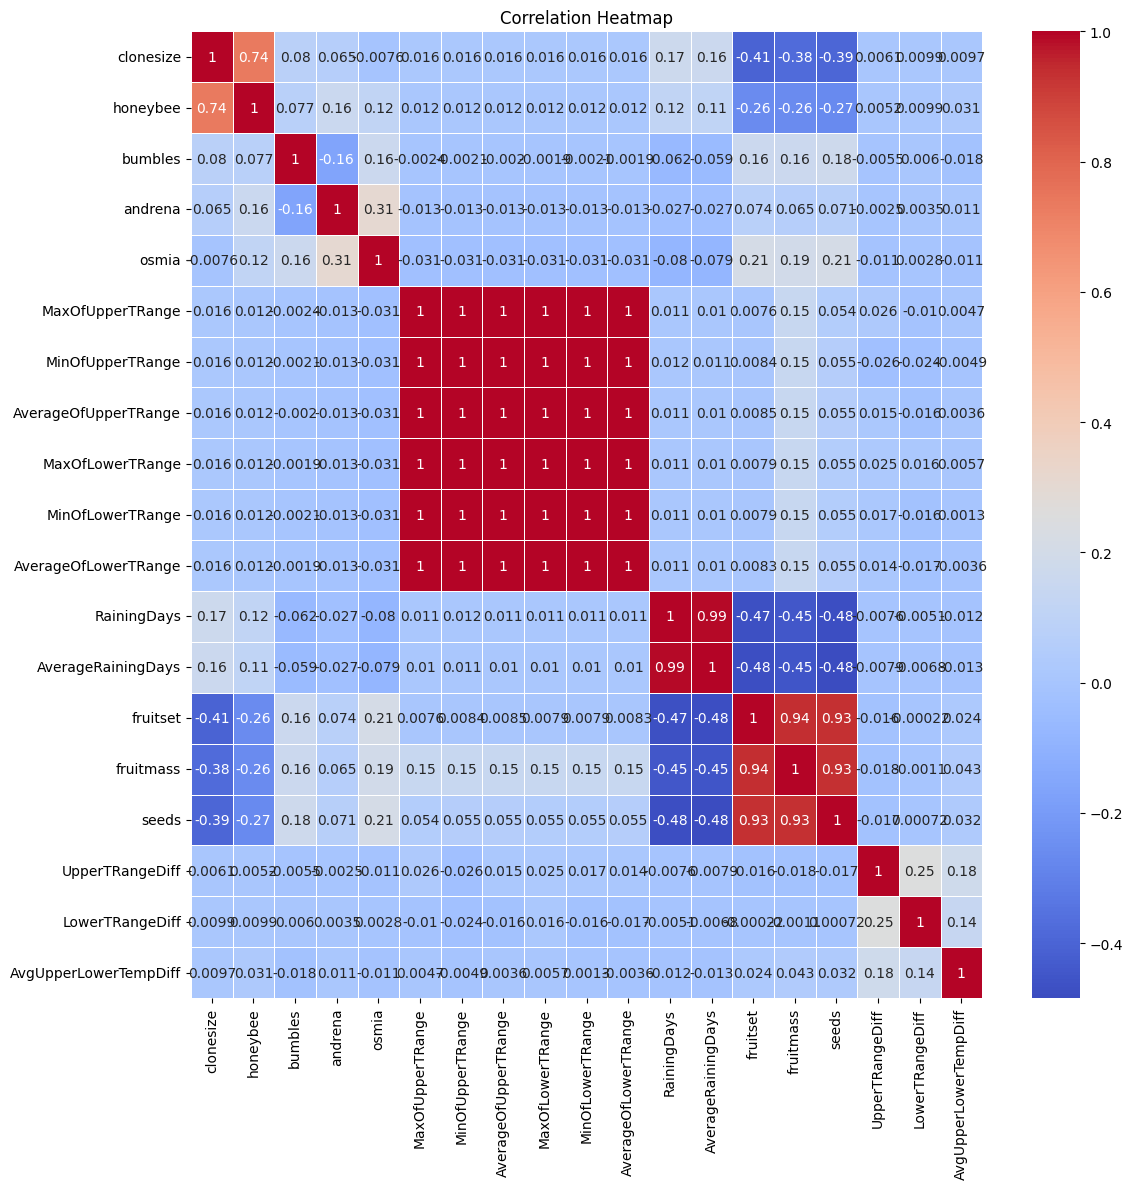

In [39]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.drop(columns='yield').corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Preparing the data for modelling

In [40]:
# Splitting the data
x = data.drop(columns='yield', axis=1)
y = data['yield']

# Create train and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=42)

In [41]:
# Perform cross validation
def cv_mae(model, x, y, cv=5):
    mae_scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv)
    return -mae_scores.mean()

#### Create and evaluate models using cross-validation


In [42]:
#Linear Regression
ln_model = LinearRegression()
ln_model_mae = cv_mae (ln_model, x_train, y_train)
print(f"Linear Regression MAE: {ln_model_mae:.6f}")

Linear Regression MAE: 0.280205


In [43]:
#Polynomial Regression (2)

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model_mae = cv_mae(poly_model, x_train, y_train)
print(f"Polynomial Regression MAE: {poly_model_mae:.4f}")

Polynomial Regression MAE: 438035330.7513


In [44]:
#Ridge Regression
# Define a range of alpha values to test
alphas = np.logspace(-3, 3, 7)  # This creates 7 values from 0.001 to 1000

ridge_results = {}

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model_mae = cv_mae(ridge_model, x_train, y_train)
    ridge_results[alpha] = ridge_model_mae
    print(f"Ridge Regression (alpha={alpha:.3f}) MAE: {ridge_model_mae:.5f}")

# Find the best alpha
best_alpha = min(ridge_results, key=ridge_results.get)
print(f"\nBest alpha: {best_alpha:.3f}")
print(f"Best Ridge Regression MAE: {ridge_results[best_alpha]:.6f}")

Ridge Regression (alpha=0.001) MAE: 0.28023
Ridge Regression (alpha=0.010) MAE: 0.28023
Ridge Regression (alpha=0.100) MAE: 0.28022
Ridge Regression (alpha=1.000) MAE: 0.28047
Ridge Regression (alpha=10.000) MAE: 0.28494
Ridge Regression (alpha=100.000) MAE: 0.30613
Ridge Regression (alpha=1000.000) MAE: 0.33469

Best alpha: 0.100
Best Ridge Regression MAE: 0.280224


In [45]:
#Lasso Regression
# Define a range of alpha values to test
alphas = np.logspace(-3, 3, 7)  # This creates 7 values from 0.001 to 1000

lasso_results = {}

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model_mae = cv_mae(lasso_model, x_train, y_train)
    lasso_results[alpha] = lasso_model_mae
    print(f"Lasso Regression (alpha={alpha:.3f}) MAE: {lasso_model_mae:.4f}")

# Find the best alpha
best_alpha = min(lasso_results, key=lasso_results.get)
print(f"\nBest alpha: {best_alpha:.3f}")
print(f"Best Lasso Regression MAE: {lasso_results[best_alpha]:.5f}")

Lasso Regression (alpha=0.001) MAE: 0.2808
Lasso Regression (alpha=0.010) MAE: 0.3109
Lasso Regression (alpha=0.100) MAE: 0.3771
Lasso Regression (alpha=1.000) MAE: 0.8190
Lasso Regression (alpha=10.000) MAE: 0.8190
Lasso Regression (alpha=100.000) MAE: 0.8190
Lasso Regression (alpha=1000.000) MAE: 0.8190

Best alpha: 0.001
Best Lasso Regression MAE: 0.28083


In [46]:
#Elastic Net Regression

# Define ranges for alpha and l1_ratio
alphas = np.logspace(-3, 3, 7)  # 7 values from 0.001 to 1000
l1_ratios = np.linspace(0.1, 0.9, 5)  # 5 values from 0.1 to 0.9

elastic_results = {}

for alpha in alphas:
    for l1_ratio in l1_ratios:
        elastic_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic_model_mae = cv_mae(elastic_model, x_train, y_train)
        elastic_results[(alpha, l1_ratio)] = elastic_model_mae
        print(f"Elastic Net (alpha={alpha:.3f}, l1_ratio={l1_ratio:.1f}) MAE: {elastic_model_mae:.4f}")

# Find the best combination
best_params = min(elastic_results, key=elastic_results.get)
best_alpha, best_l1_ratio = best_params
print(f"\nBest alpha: {best_alpha:.3f}")
print(f"Best l1_ratio: {best_l1_ratio:.1f}")
print(f"Best Elastic Net Regression MAE: {elastic_results[best_params]:.4f}")

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.607e+01, tolerance: 9.746e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+01, tolerance: 9.818e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

Elastic Net (alpha=0.001, l1_ratio=0.1) MAE: 0.2844
Elastic Net (alpha=0.001, l1_ratio=0.3) MAE: 0.2836
Elastic Net (alpha=0.001, l1_ratio=0.5) MAE: 0.2828
Elastic Net (alpha=0.001, l1_ratio=0.7) MAE: 0.2820
Elastic Net (alpha=0.001, l1_ratio=0.9) MAE: 0.2812
Elastic Net (alpha=0.010, l1_ratio=0.1) MAE: 0.3058
Elastic Net (alpha=0.010, l1_ratio=0.3) MAE: 0.3061
Elastic Net (alpha=0.010, l1_ratio=0.5) MAE: 0.3065
Elastic Net (alpha=0.010, l1_ratio=0.7) MAE: 0.3074
Elastic Net (alpha=0.010, l1_ratio=0.9) MAE: 0.3090
Elastic Net (alpha=0.100, l1_ratio=0.1) MAE: 0.3391
Elastic Net (alpha=0.100, l1_ratio=0.3) MAE: 0.3492
Elastic Net (alpha=0.100, l1_ratio=0.5) MAE: 0.3573
Elastic Net (alpha=0.100, l1_ratio=0.7) MAE: 0.3644
Elastic Net (alpha=0.100, l1_ratio=0.9) MAE: 0.3726
Elastic Net (alpha=1.000, l1_ratio=0.1) MAE: 0.5248
Elastic Net (alpha=1.000, l1_ratio=0.3) MAE: 0.5949
Elastic Net (alpha=1.000, l1_ratio=0.5) MAE: 0.6752
Elastic Net (alpha=1.000, l1_ratio=0.7) MAE: 0.7516
Elastic Net 

Best model = Ridge model (alpha= 0.1)

In [47]:
#Feature importance
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)

# Get the feature coefficients
coefficients = ridge_model.coef_

# Create a dataframe of features and their coefficients
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
})
feature_importance

,Feature,Coefficient
0,clonesize,-0.102717
1,honeybee,-0.004056
2,bumbles,0.031704
3,andrena,0.059787
4,osmia,0.022966
5,MaxOfUpperTRange,0.268384
6,MinOfUpperTRange,0.172555
7,AverageOfUpperTRange,-1.188252
8,MaxOfLowerTRange,0.645563
9,MinOfLowerTRange,1.144538


### Model Training

In [48]:
#Instantiate the model
ridge_model = Ridge(alpha=0.1)

#train
ridge_model.fit(x_train, y_train)

#predict
y_train_pred = ridge_model.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)

y_test_pred = ridge_model.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)

In [ ]:
train_mse

0.19129931529484945

In [ ]:
test_mse

0.18648010164399123

## TEST DATA

In [51]:
#Read test data
test_data = pd.read_csv('test.csv')
test_data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [52]:
#Extract the test id's
test_ids = test_data['id']

In [58]:
# Drop the id column
test_data.drop(columns='id', inplace=True)

In [55]:
#Log transformation
log_features = ['honeybee', 'bumbles', 'seeds']
epsilon = 1e-8
for feature in log_features:
    test_data[feature] = np.log1p(test_data[feature] + epsilon)

In [61]:
#SCALING

# Standard scaling for features with a normal distribution
standard_features = ['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
                     'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
                     'fruitmass']
scaler_standard = StandardScaler()
test_data[standard_features] = scaler_standard.fit_transform(test_data[standard_features])

# Robust scaling for skewed distribution
robust_features = ['honeybee', 'bumbles', 'seeds']
scaler_robust = RobustScaler()
test_data[robust_features] = scaler_robust.fit_transform(test_data[robust_features])

# MinMax scaling for uniform or bimodial distribution
minmax_features = ['clonesize', 'andrena', 'osmia', 'RainingDays', 'AverageRainingDays', 'fruitset']
scaler_minmax = MinMaxScaler()
test_data[minmax_features] = scaler_minmax.fit_transform(test_data[minmax_features])


In [62]:
#Aggregation
# Temperature range difference
test_data['UpperTRangeDiff'] = test_data['MaxOfUpperTRange'] - test_data['MinOfUpperTRange']
test_data['LowerTRangeDiff'] = test_data['MaxOfLowerTRange'] - test_data['MinOfLowerTRange']

# Average temperature difference
test_data['AvgUpperLowerTempDiff'] = test_data['AverageOfUpperTRange'] - test_data['AverageOfLowerTRange']


In [63]:
#predict data
y_pred = ridge_model.predict(test_data)

In [64]:
#Store result in a dataframe
submission_df = pd.DataFrame({'id':test_ids,
                              'yield':y_pred})

In [65]:
#Convert to a csv file
submission_df.to_csv('Betty_submission_csv.csv',index=False)

In [66]:
y_test_pred = ridge_model.predict(x_test)
y_test_pred

array([ 0.72022733,  0.28196777, -1.25664059, ...,  0.43410786,
        0.40333729,  0.44909087])